In [59]:
%matplotlib inline

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from LLS import LLS

In [61]:
boston = pd.read_csv('Input\Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
corr_matrix = boston.corr()
print(corr_matrix)

            Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
crim          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
zn           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
indus         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
chas         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
nox           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
rm           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
age           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
dis          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
rad           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
tax           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
ptratio       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
black       

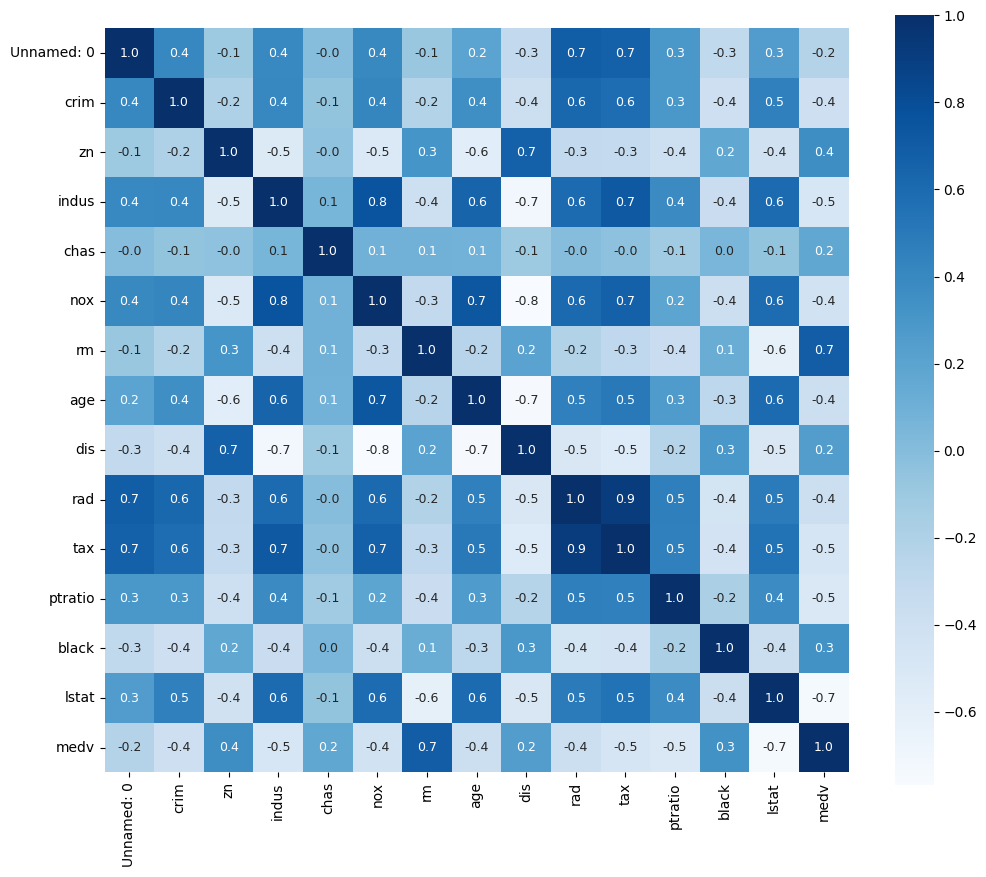

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(boston.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':9}, cmap='Blues')
plt.show()

In [64]:
correlation_with_target = corr_matrix['medv'].abs().sort_values(ascending=False)
top_2_features = correlation_with_target.index[1:3] 
print("Top 2 features selected for X:", top_2_features)
X = boston[['rm','zn']]
y = boston['medv']


Top 2 features selected for X: Index(['lstat', 'rm'], dtype='object')


In [65]:
print(X.head())
print(y.head())

      rm    zn
0  6.575  18.0
1  6.421   0.0
2  7.185   0.0
3  6.998   0.0
4  7.147   0.0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=.2)


In [67]:
lls = LLS()
w = lls.fit(X_train,Y_train)


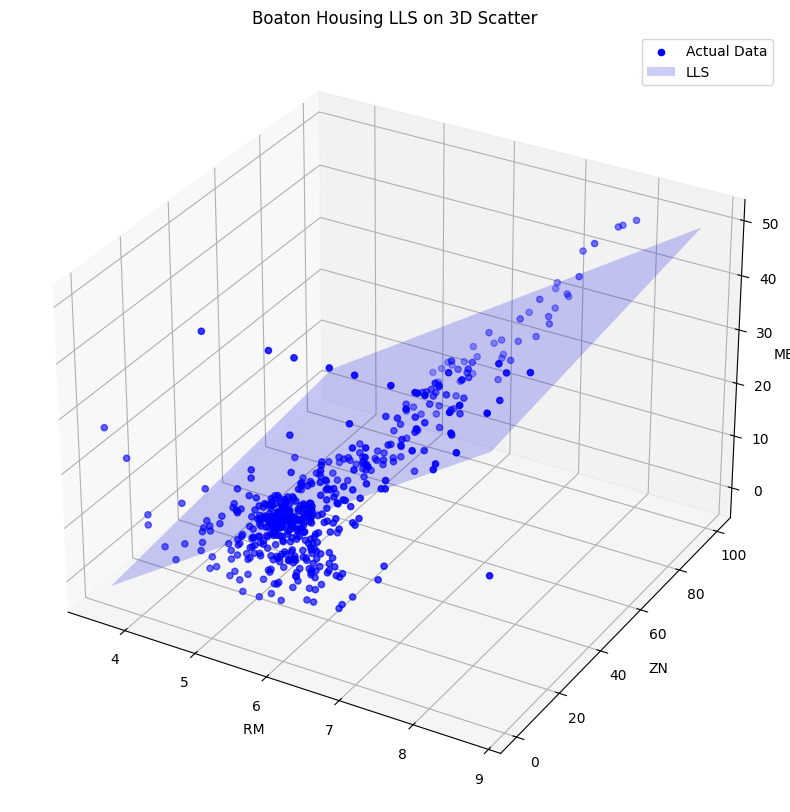

In [68]:
rm_range = np.linspace(boston['rm'].min(), boston['rm'].max(), 50)
zn_range = np.linspace(boston['zn'].min(), boston['zn'].max(), 50)
rm_grid, zn_grid = np.meshgrid(rm_range, zn_range)

X_grid = np.c_[rm_grid.ravel(), zn_grid.ravel()]
y_pred_grid = lls.predict(X_grid).reshape(rm_grid.shape)


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(boston['rm'], boston['zn'], boston['medv'], color='blue', label='Actual Data')
ax.plot_surface(rm_grid, zn_grid, y_pred_grid, color='blue', alpha=0.2, rstride=120, cstride=120, label='LLS')
ax.set_xlabel('RM ')
ax.set_ylabel('ZN')
ax.set_zlabel('MEDV')
ax.set_title('Boaton Housing LLS on 3D Scatter')
plt.legend()
plt.show()
